In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

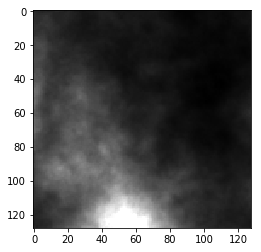

In [14]:
DATADIR = "D:/ExponentiatedNonPeriodicNoisy/Testing/features"

for img in os.listdir(DATADIR):
    img_array = np.loadtxt(os.path.join(DATADIR,img))
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    break

In [15]:
print(img_array)

[[0.17185548 0.16203422 0.15109587 ... 0.06537537 0.07184315 0.07704258]
 [0.16627461 0.16326878 0.15088464 ... 0.06664555 0.07164116 0.07400295]
 [0.17281955 0.1685928  0.16093751 ... 0.06399741 0.06653508 0.07502151]
 ...
 [0.1266621  0.13541925 0.13728949 ... 0.09801143 0.09663555 0.09046098]
 [0.13479967 0.13393087 0.13139595 ... 0.09866195 0.09746043 0.09002794]
 [0.14279919 0.1390102  0.13123314 ... 0.10362794 0.10519916 0.09708447]]


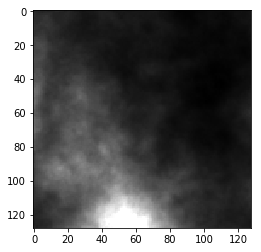

In [16]:
IMG_SIZE = 128

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [17]:
labels = np.loadtxt("D:/ExponentiatedNonPeriodicNoisy/Testing/labels/labels.txt")
print(labels)

[[0.81647732 1.10987981]
 [0.67725888 1.09585004]
 [0.37683244 1.61691835]
 ...
 [0.18330174 2.83424495]
 [0.74456015 0.18202581]
 [0.63540898 0.33415455]]


In [18]:
training_data = []

def create_training_data():
    c=0
    for img in tqdm(os.listdir(DATADIR)):
        try:
            img_array = np.loadtxt(os.path.join(DATADIR,img))
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,labels[c]])
            c+=1
        except Exception as e:
            pass

create_training_data()
print(len(training_data))

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:25<00:00, 23.46it/s]


2000


In [19]:
import random

random.shuffle(training_data)

In [20]:
for sample in training_data[:10]:
    print(sample[1])

[0.1012843  1.42209074]
[0.11309985 2.75008661]
[0.66779644 2.09435416]
[0.7071248 0.6143868]
[0.79204599 1.63128614]
[0.75044533 0.36449283]
[0.4185351 0.2784791]
[0.5287633  1.99580214]
[0.19363631 2.23327329]
[0.36736274 1.92797209]


In [21]:
X = []
H = []
sigma = []
y=[]

for features,label in training_data:
    X.append(features)
    H.append(label[0])
    sigma.append(label[1])
    
y = [H,sigma]
    
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

print(y)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[0.03662889]
   [0.02710833]
   [0.04752216]
   ...
   [0.00404866]
   [0.0030347 ]
   [0.00482639]]

  [[0.02399696]
   [0.04376897]
   [0.02046547]
   ...
   [0.01102414]
   [0.01061147]
   [0.013922  ]]

  [[0.01821566]
   [0.02688489]
   [0.04007743]
   ...
   [0.02034062]
   [0.01027457]
   [0.01465505]]

  ...

  [[0.30308238]
   [0.13954756]
   [0.13715394]
   ...
   [0.14640657]
   [0.31654583]
   [0.13566583]]

  [[0.49625942]
   [0.28049326]
   [0.17980768]
   ...
   [0.31852996]
   [0.15324075]
   [0.11745975]]

  [[0.12406177]
   [0.21028508]
   [0.13332725]
   ...
   [0.0747911 ]
   [0.08902426]
   [0.03252294]]]]


[[0.10128430082404583, 0.11309985236964215, 0.6677964407198851, 0.7071248036844345, 0.7920459948279429, 0.7504453337951883, 0.4185351048894268, 0.5287633038973606, 0.19363631308201845, 0.3673627427962324, 0.004073034764868644, 0.10568659416201742, 0.7439979381753844, 0.9277689673108689, 0.9758791640676543, 0.18101163765263528, 0.6995002023109729, 0.3464385678704772, 0.8874471198527291, 0.4195769957456513, 0.27174103691161533, 0.556845410350272, 0.6298502088124087, 0.3409344157456484, 0.6772588826562507, 0.5043553201372266, 0.43509983148987885, 0.6950202434805038, 0.1305527336778689, 0.9820823747866008, 0.5421405063442561, 0.3501163172040459, 0.31416745548529945, 0.7473435073049537, 0.13351316717581452, 0.7574553027826665, 0.9781356946997977, 0.1883178405082344, 0.06968901649324755, 0.1630070561236875, 0.1513291021142108, 0.6872804392420641, 0.37292964685649876, 0.3262276112662078, 0.15984697813344018, 0.8614507128423463, 0.8816658016196615, 0.3520867200663127, 0.18454587059411542, 0.27

In [22]:
import pickle

pickle_out = open("D:/ExponentiatedNonPeriodicNoisy/Testing/X_test.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("D:/ExponentiatedNonPeriodicNoisy/Testing/y_test.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [23]:
print(training_data[1999])

[array([[0.02504053, 0.01200437, 0.00963773, ..., 0.22854569, 0.21491067,
        0.22455864],
       [0.03231052, 0.02164019, 0.01567551, ..., 0.23105334, 0.21441638,
        0.21004325],
       [0.04217209, 0.03450032, 0.02950646, ..., 0.24321397, 0.23641923,
        0.21953769],
       ...,
       [0.25602075, 0.31385238, 0.33591713, ..., 0.53134746, 0.49631531,
        0.46420836],
       [0.26315309, 0.31342638, 0.36448557, ..., 0.57176531, 0.52116407,
        0.46270117],
       [0.25616014, 0.32955697, 0.36978648, ..., 0.58203614, 0.52431137,
        0.48905411]]), array([0.7130209 , 1.26757858])]
